# Importing the necessary Libraries and the data

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/vehicles.csv')

# Exploring the data

In [3]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
37803,7312488444,modesto,10995,2010.0,ford,e-series cargo e 250 3dr,excellent,8 cylinders,gas,139212.0,NaN,automatic,1FTNE2EWXADA74715,NaN,NaN,van,NaN,ca
118660,7313826648,tampa bay area,5499,2006.0,acura,tl,good,6 cylinders,gas,176000.0,clean,automatic,NaN,fwd,full-size,sedan,silver,fl
66589,7316928334,susanville,13999,2009.0,bmw,x6,excellent,6 cylinders,gas,162990.0,clean,automatic,5UXFG43539L223678,4wd,full-size,SUV,blue,ca
163884,7310030592,waterloo / cedar falls,24900,2013.0,ford,f-150,good,6 cylinders,gas,56864.0,clean,automatic,1FTMF1EM2DFB02498,4wd,full-size,truck,grey,ia
6289,7311106656,anchorage / mat-su,86977,2017.0,ford,f450 super duty crew cab,excellent,8 cylinders,diesel,16806.0,clean,automatic,1FT8W4DT9HED67880,NaN,NaN,NaN,NaN,ak


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


## Data cleaning

percentage of data missing

In [7]:
100*df.isnull().sum()/df.shape[0]

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

Let's remove the data with low percentage of data missing

In [8]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model','title_status'])

In [9]:
df.fillna('other', inplace=True)

In [10]:
df['year'] = df['year'].astype(int)
df['age'] = 2022-df['year']

In [11]:
df['price'].quantile([.08, .99])

0.08       99.0
0.99    64999.0
Name: price, dtype: float64

In [12]:
df['odometer'].quantile([.08, .99])

0.08     12645.16
0.99    267274.03
Name: odometer, dtype: float64

## Removal of the outliers

In [13]:
df_n = df.loc[(df['price']>100.0) & (df['price']<70000.0)& (df['odometer']<270000.0)]

## Trend of some features

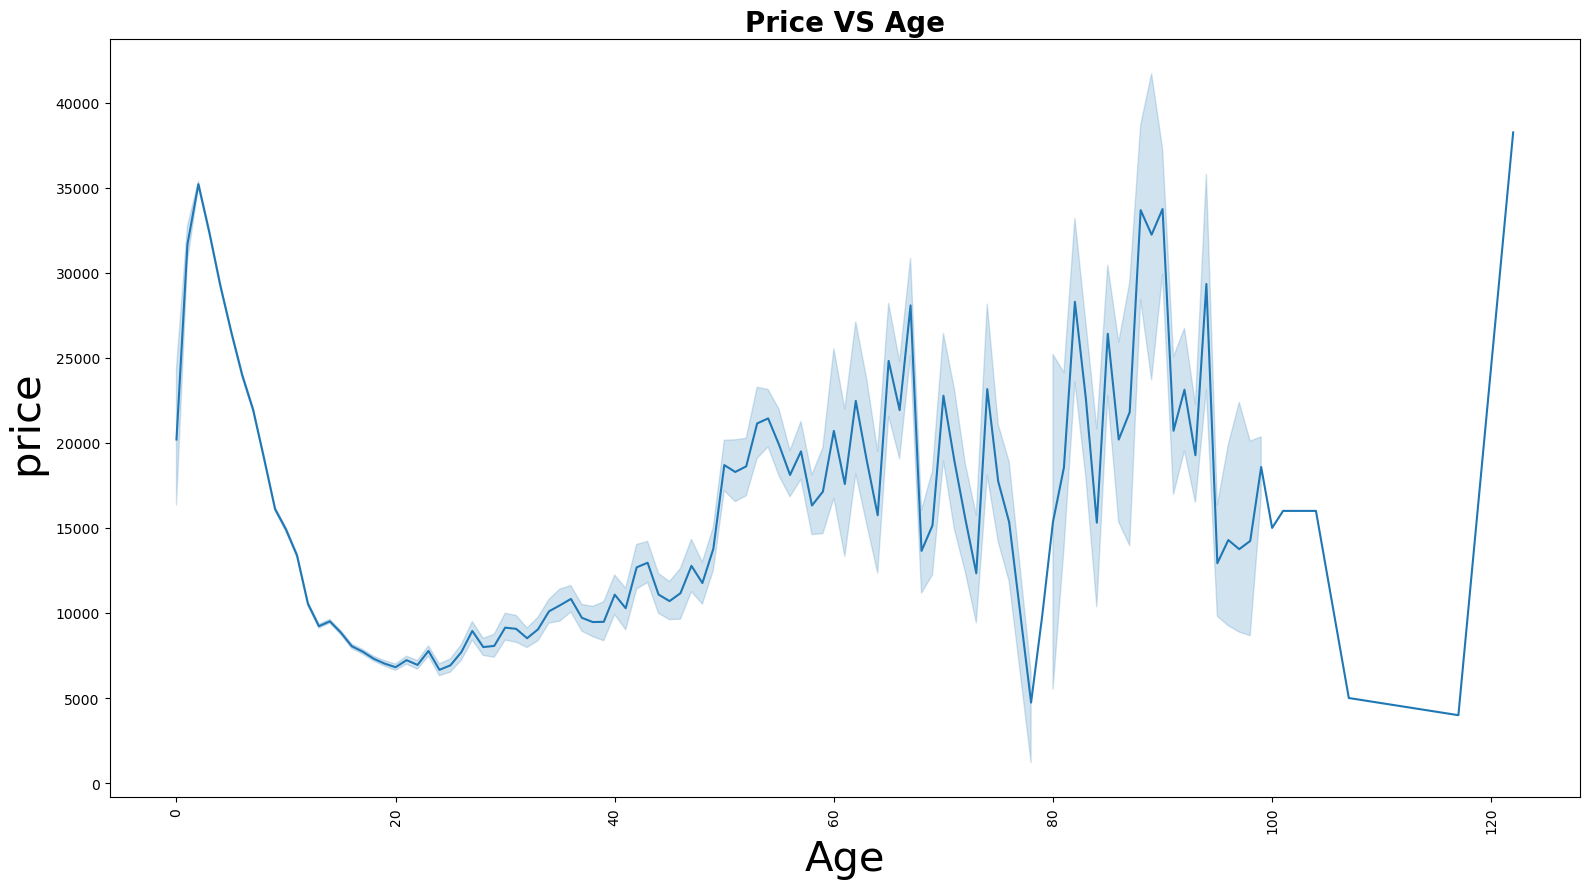

In [14]:
plt.figure(figsize=(16,9))
sns.lineplot(x='age',y='price',data=df_n)
plt.title("Price VS Age",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('price ',fontsize = 30)
plt.tight_layout()
plt.show()

Over 20 years of age the price starts going up again. That segment is for collectors

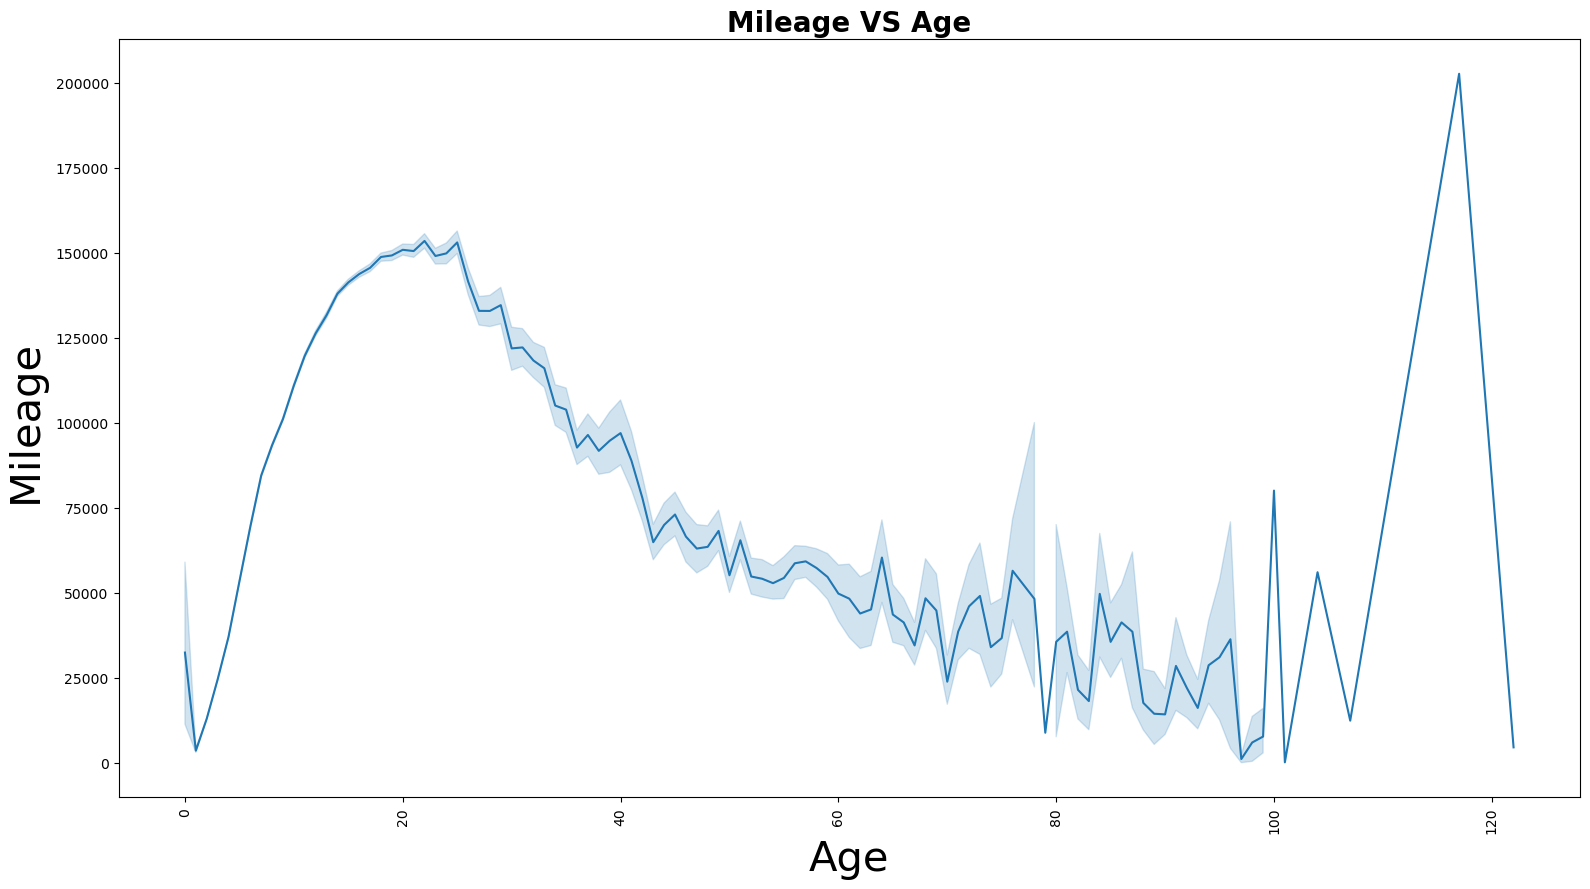

In [15]:
plt.figure(figsize=(16,9))
sns.lineplot(x='age',y='odometer',data=df_n)
plt.title("Mileage VS Age",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Mileage ',fontsize = 30)
plt.tight_layout()
plt.show()

The maximum mileage to sell a car is around 150k miles

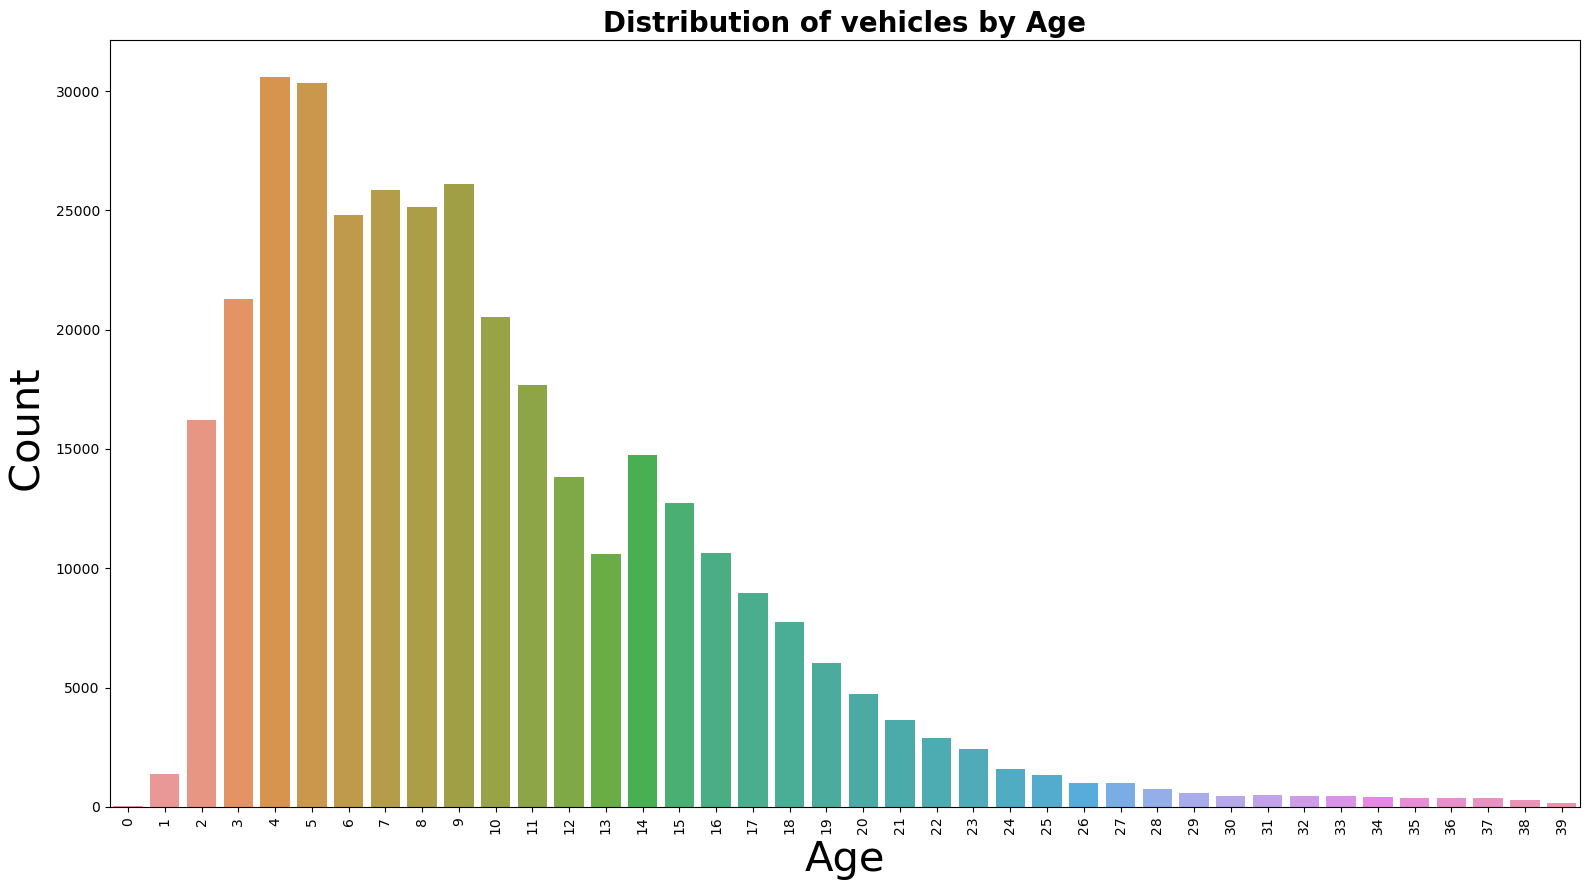

In [16]:
plt.figure(figsize=(16,9))
sns.countplot(x='age',data=df_n.loc[df_n['age']<40])
plt.title("Distribution of vehicles by Age",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

The ideal age to sell a car is between 4 and 5 years old

/home/keinti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


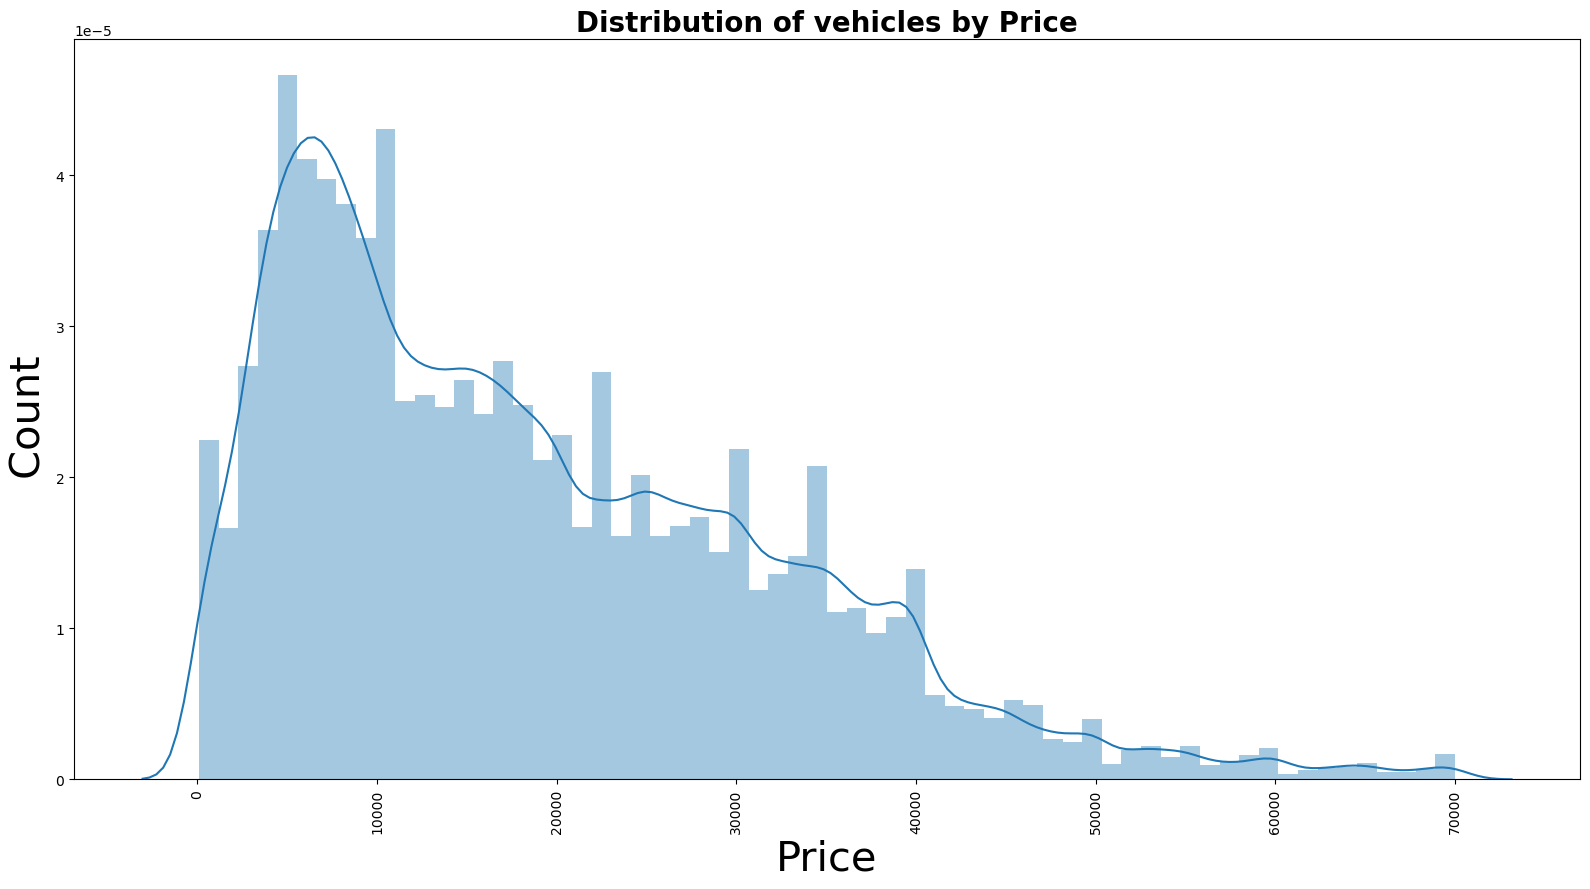

In [17]:
plt.figure(figsize=(16,9))
sns.distplot(df_n['price'],kde=True,bins=64)
plt.title("Distribution of vehicles by Price",fontsize=20,fontweight ='bold')
plt.xlabel('Price',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

Most of the cars are sold at a price of $7500

/home/keinti/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


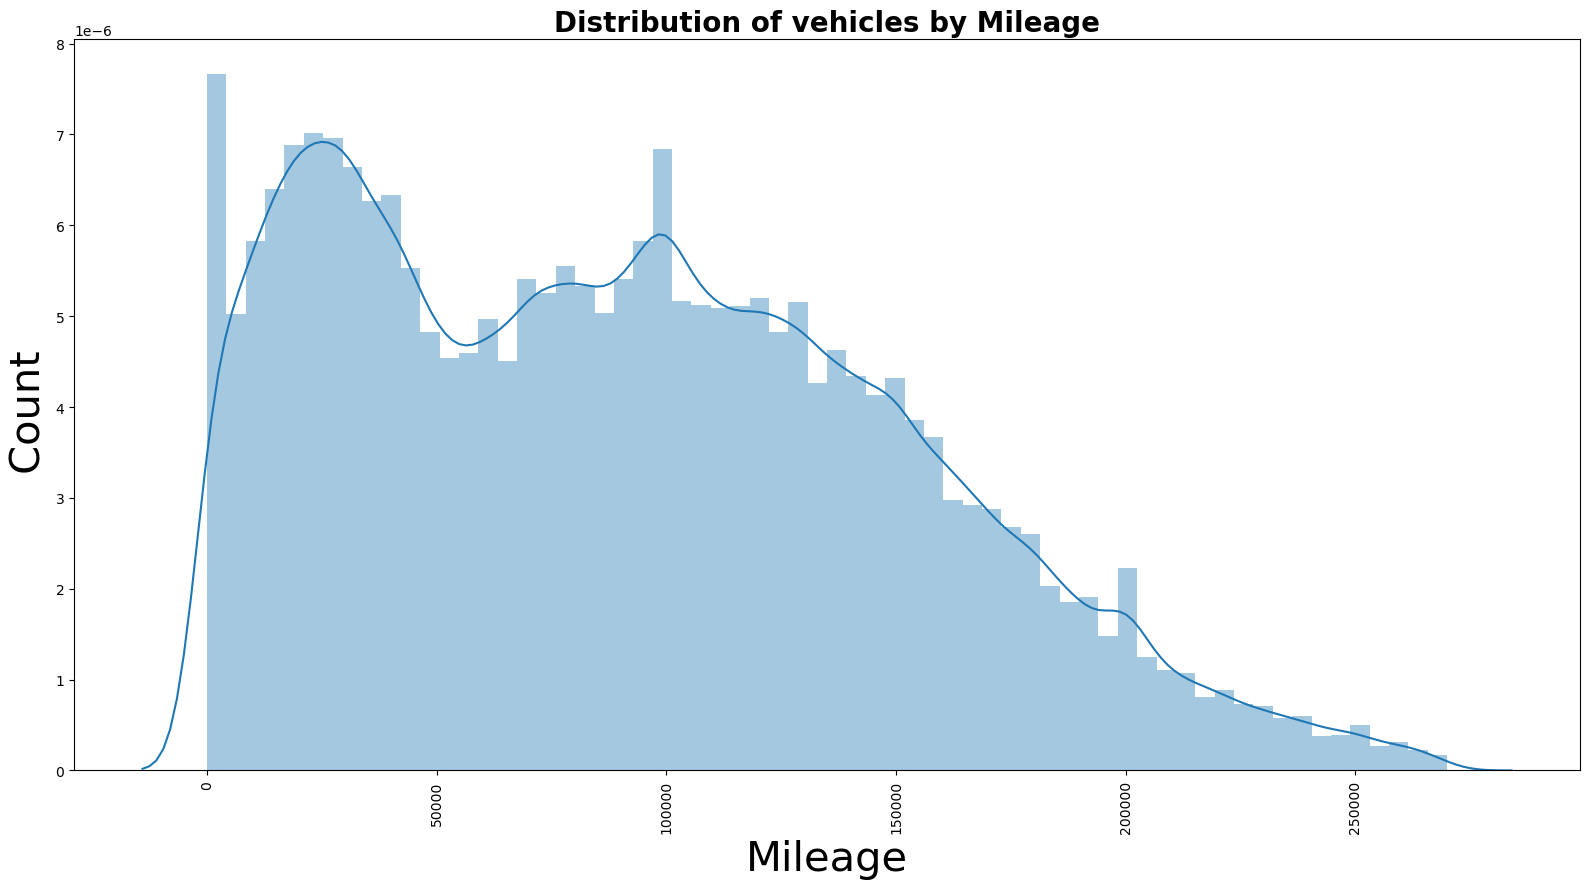

In [18]:
plt.figure(figsize=(16,9))
sns.distplot(df_n['odometer'],kde=True,bins=64)
plt.title("Distribution of vehicles by Mileage",fontsize=20,fontweight ='bold')
plt.xlabel('Mileage',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

The ideal mileage i between 0 and 100k miles

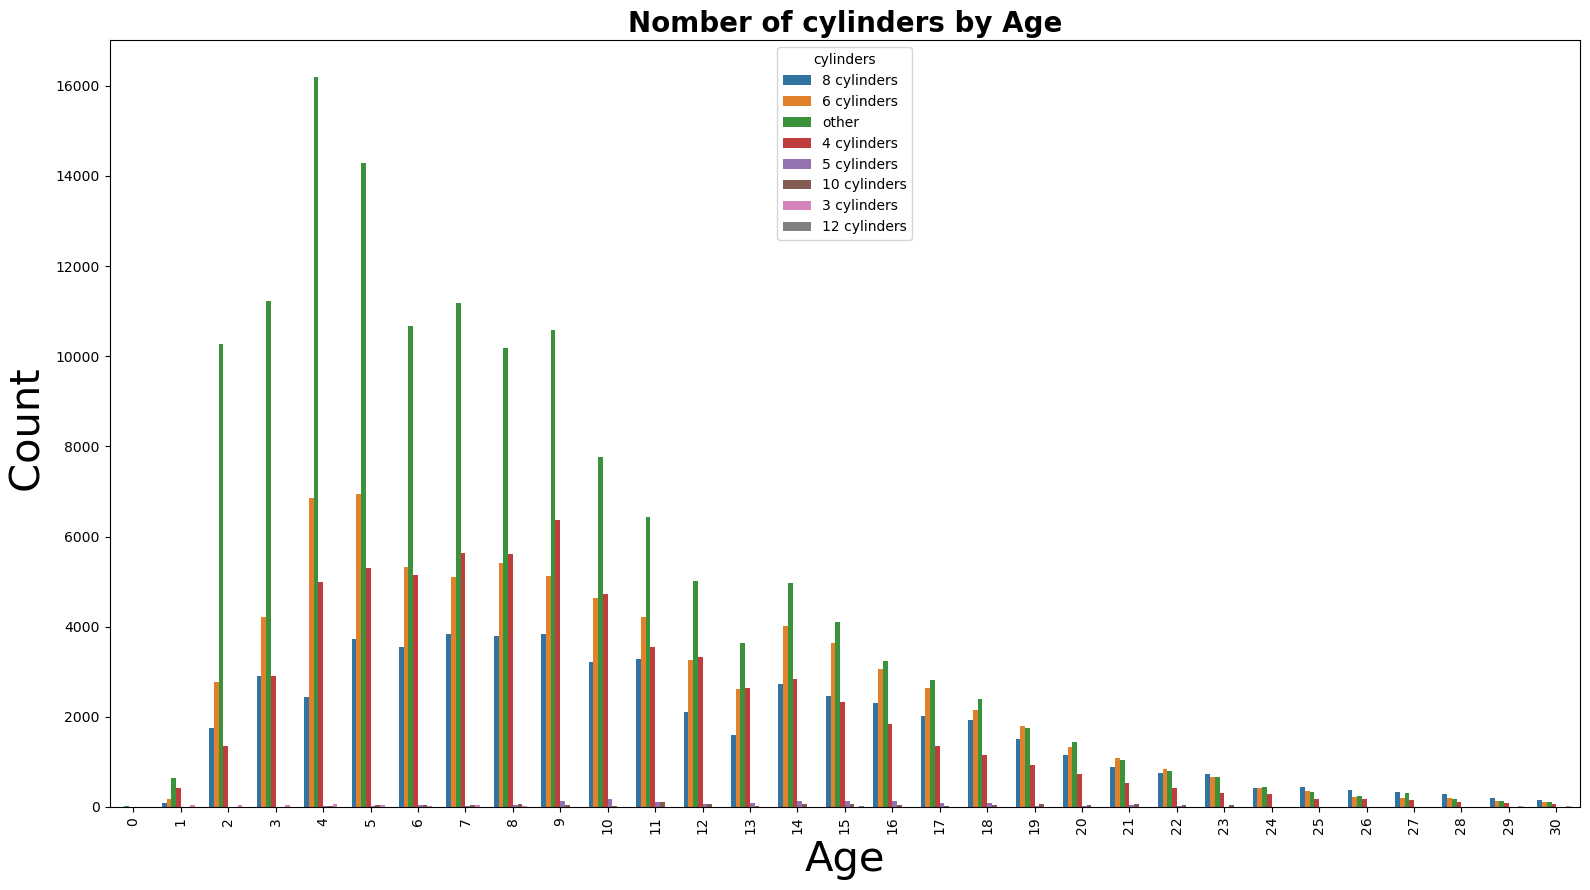

In [19]:
plt.figure(figsize=(16,9))
sns.countplot(x='age',data=df_n.loc[df_n['age']<31],hue='cylinders')
plt.title("Nomber of cylinders by Age",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

Between 0 and 30 years, most the vehicle sold have 4, 6 or 8 cylinders

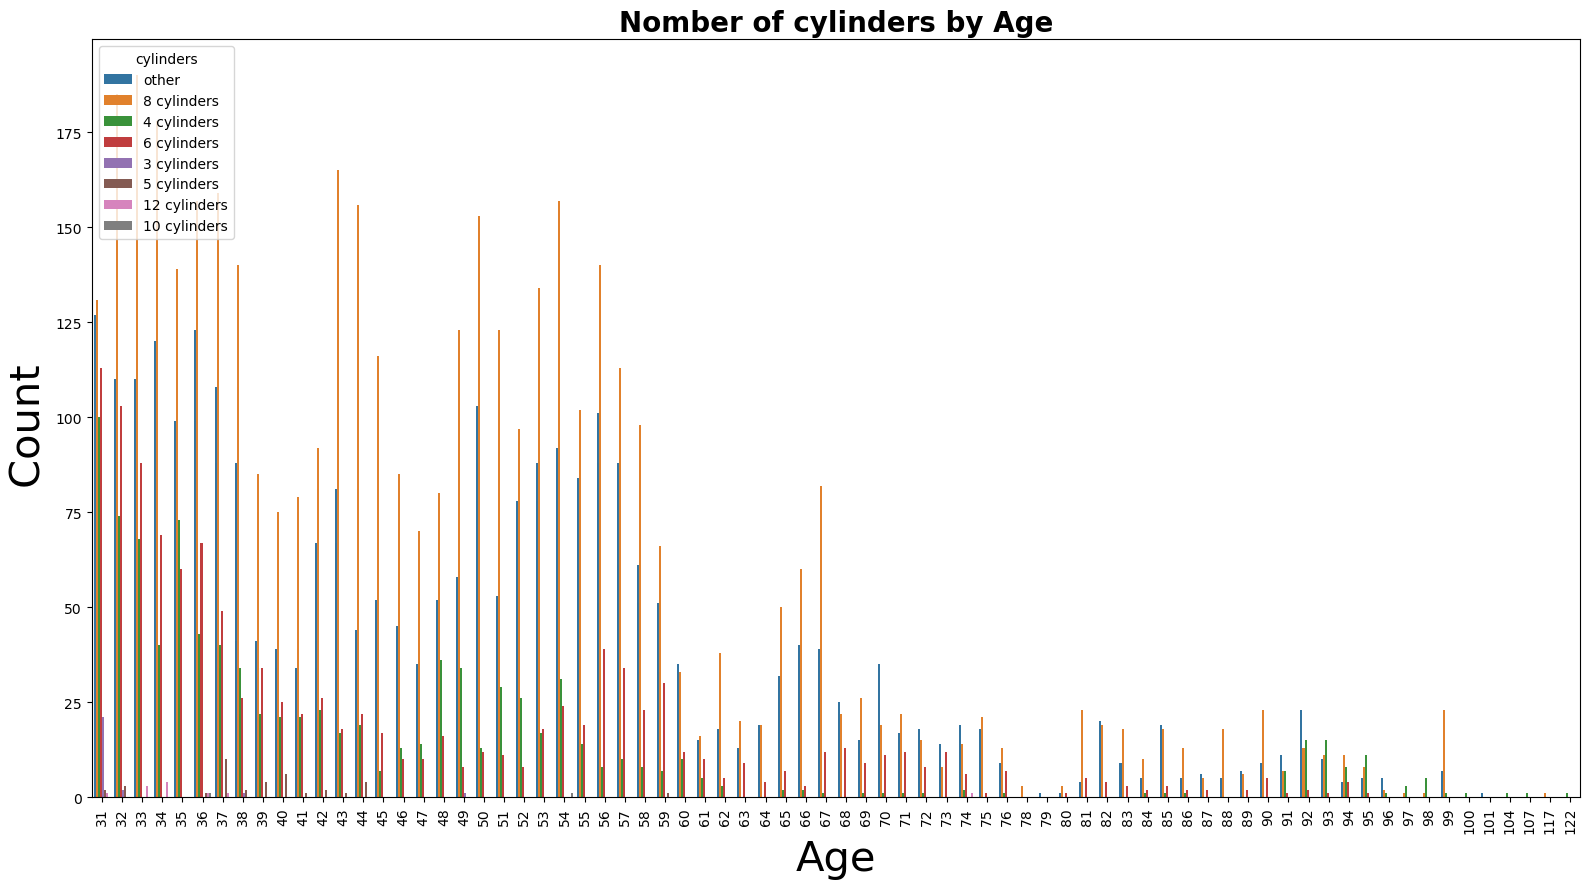

In [20]:
plt.figure(figsize=(16,9))
sns.countplot(x='age',data=df_n.loc[df_n['age']>=31],hue='cylinders')
plt.title("Nomber of cylinders by Age",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

Over 30 years, most of the used cars have 8 cylinders and above

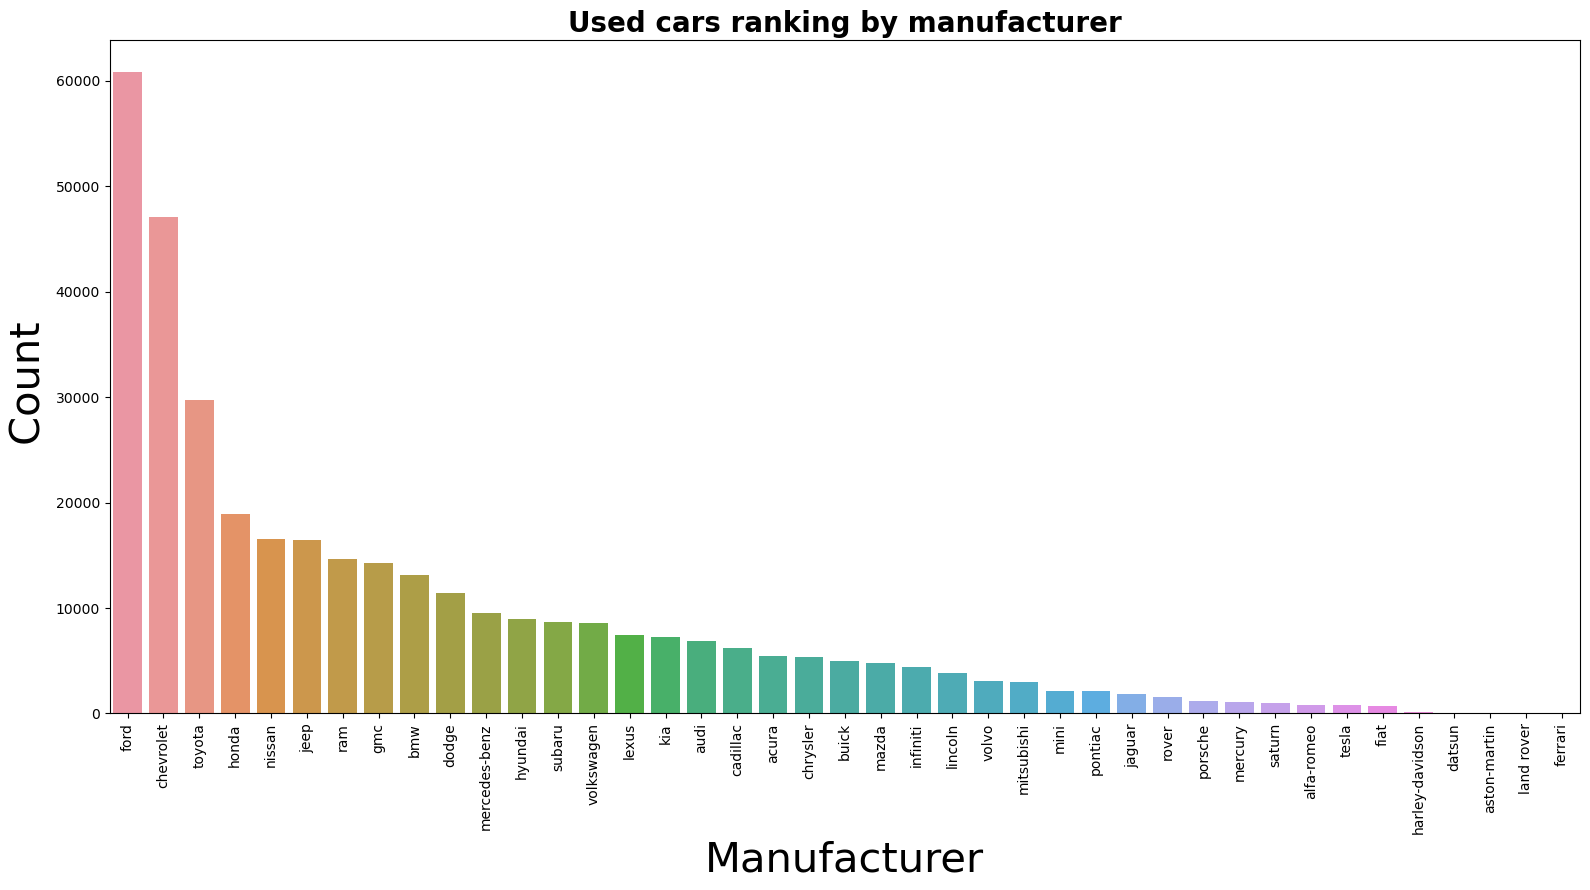

In [21]:
plt.figure(figsize=(16,9))
sns.countplot(x='manufacturer',data=df_n,order=df_n['manufacturer'].value_counts().index)
plt.title("Used cars ranking by manufacturer",fontsize=20,fontweight ='bold')
plt.xlabel('Manufacturer',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

The most popular manufacturer in the US is Ford followed by Chevrolet and Toyota

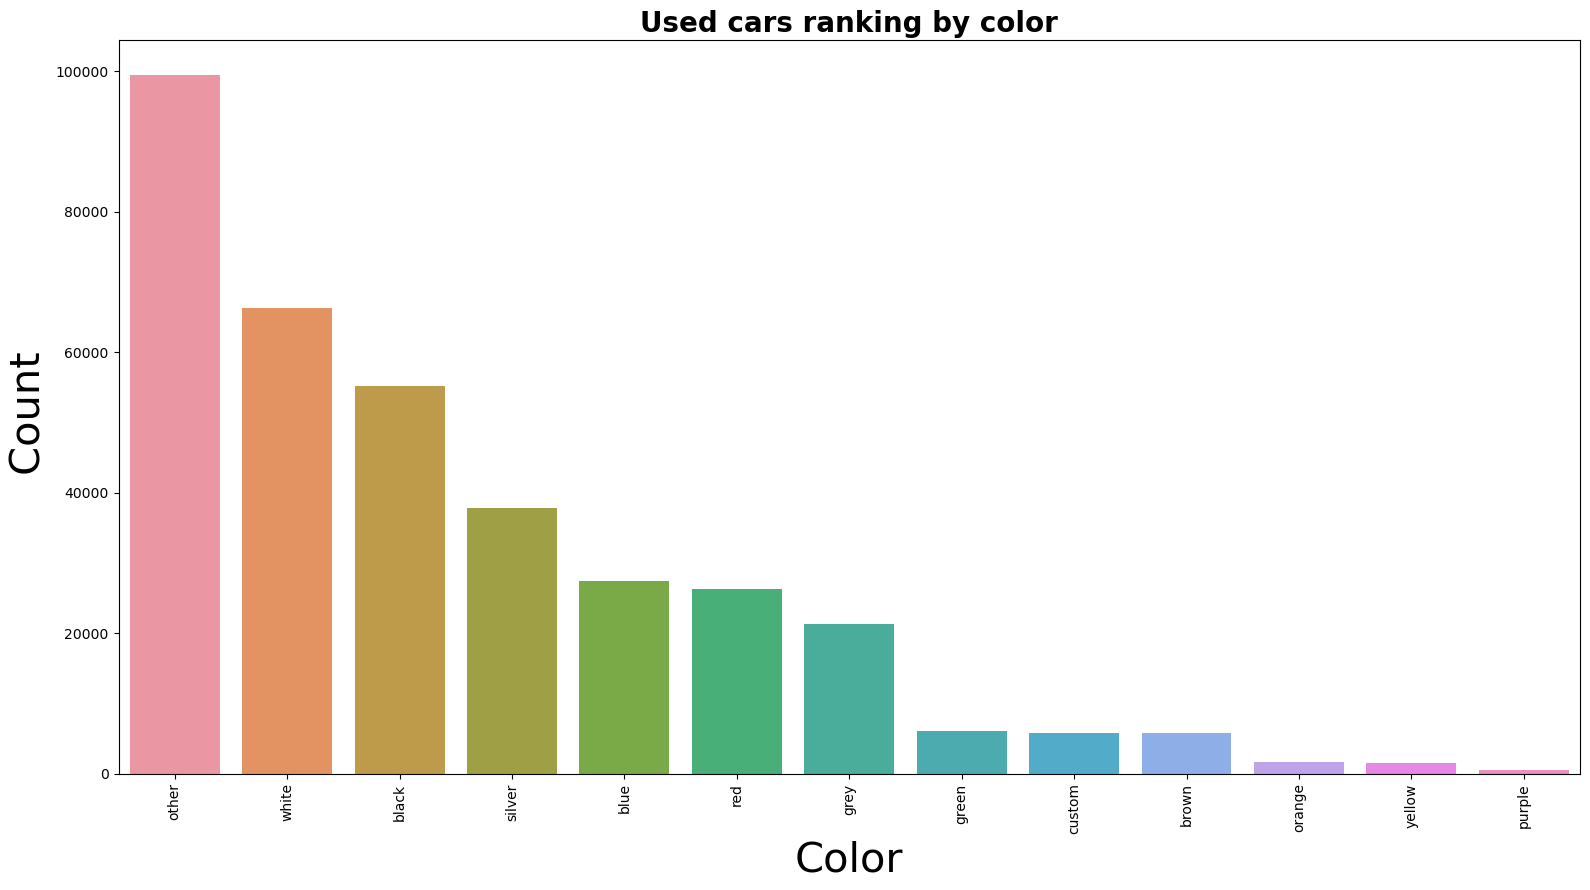

In [22]:
plt.figure(figsize=(16,9))
sns.countplot(x='paint_color',data=df_n,order=df_n['paint_color'].value_counts().index)
plt.title("Used cars ranking by color",fontsize=20,fontweight ='bold')
plt.xlabel('Color',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

The most two popular colors for cars are white and black

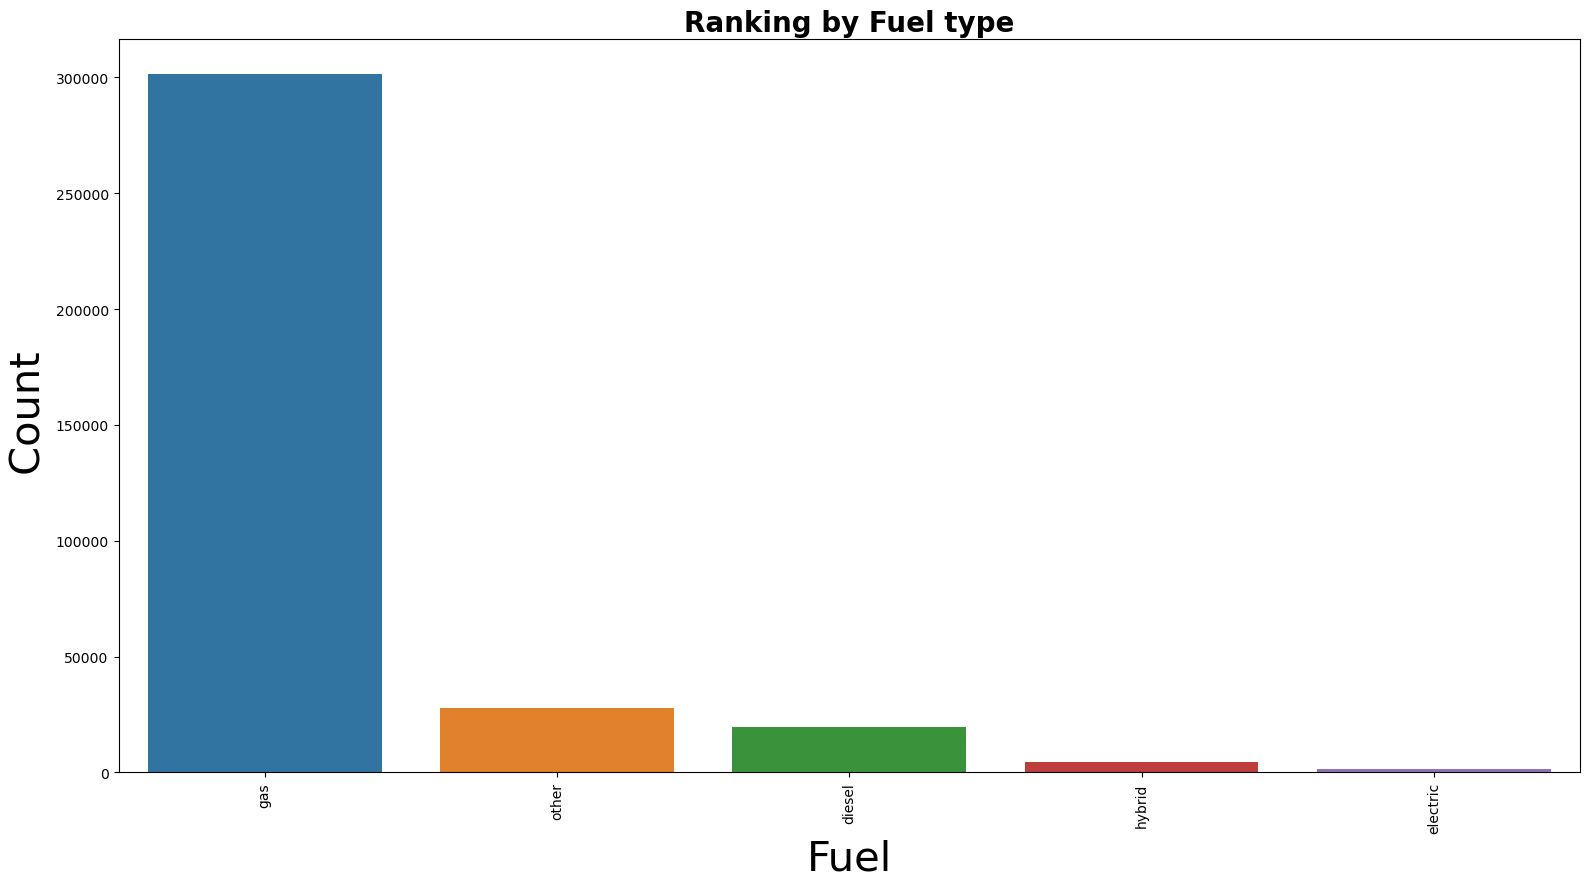

In [23]:
plt.figure(figsize=(16,9))
sns.countplot(x='fuel',data=df_n,order=df_n['fuel'].value_counts().index)
plt.title("Ranking by Fuel type",fontsize=20,fontweight ='bold')
plt.xlabel('Fuel',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

Gas is the most used fuel type

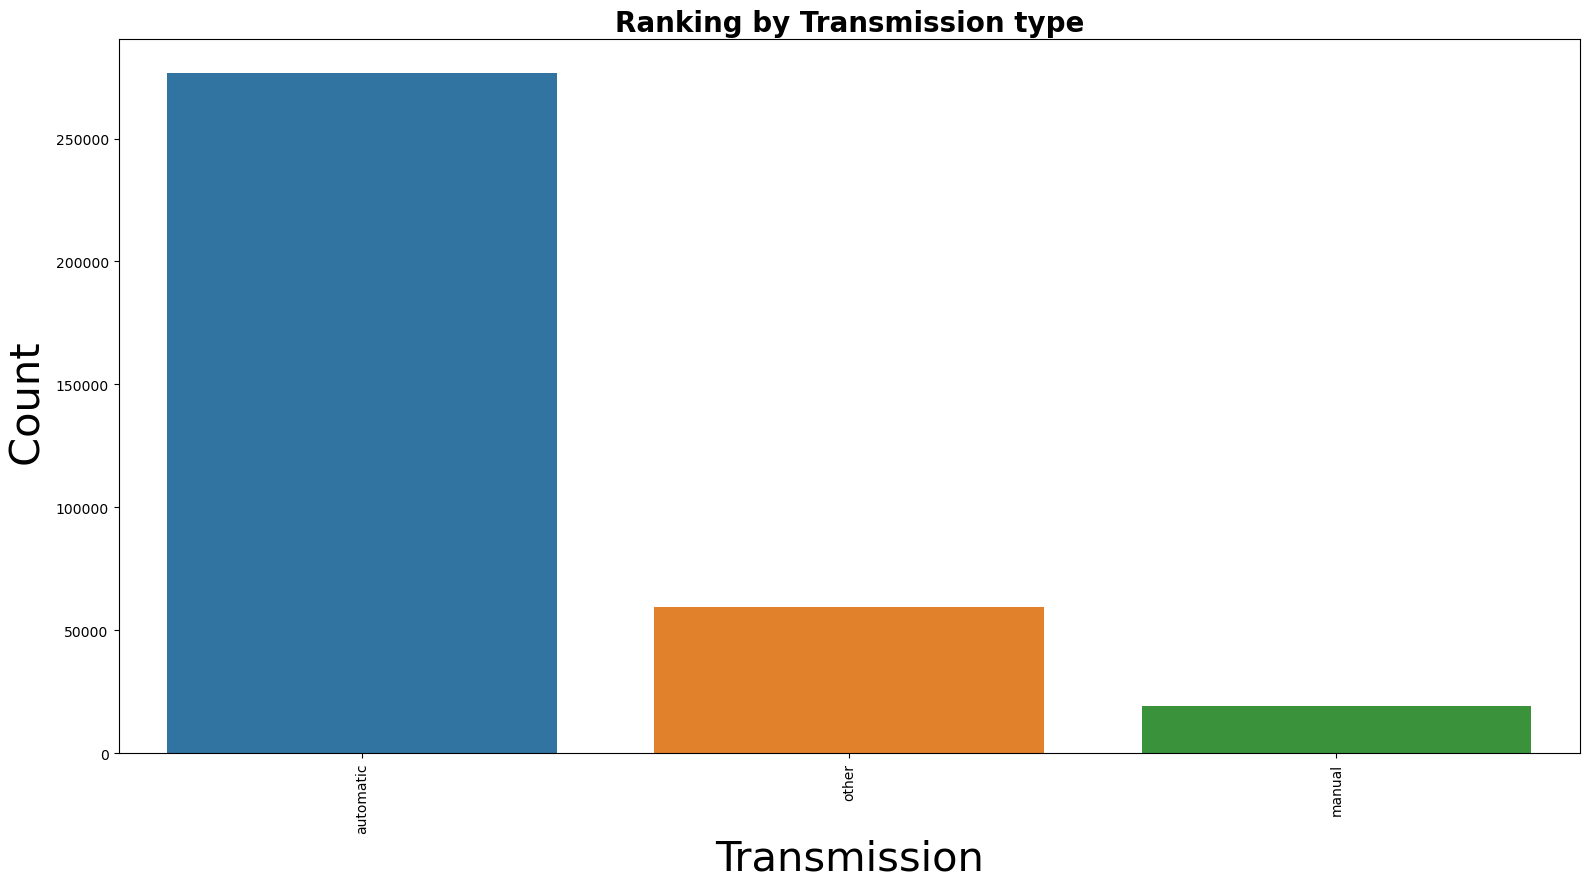

In [24]:
plt.figure(figsize=(16,9))
sns.countplot(x='transmission',data=df_n,order=df_n['transmission'].value_counts().index)
plt.title("Ranking by Transmission type",fontsize=20,fontweight ='bold')
plt.xlabel('Transmission',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

Automatic transmission is the most frequent one

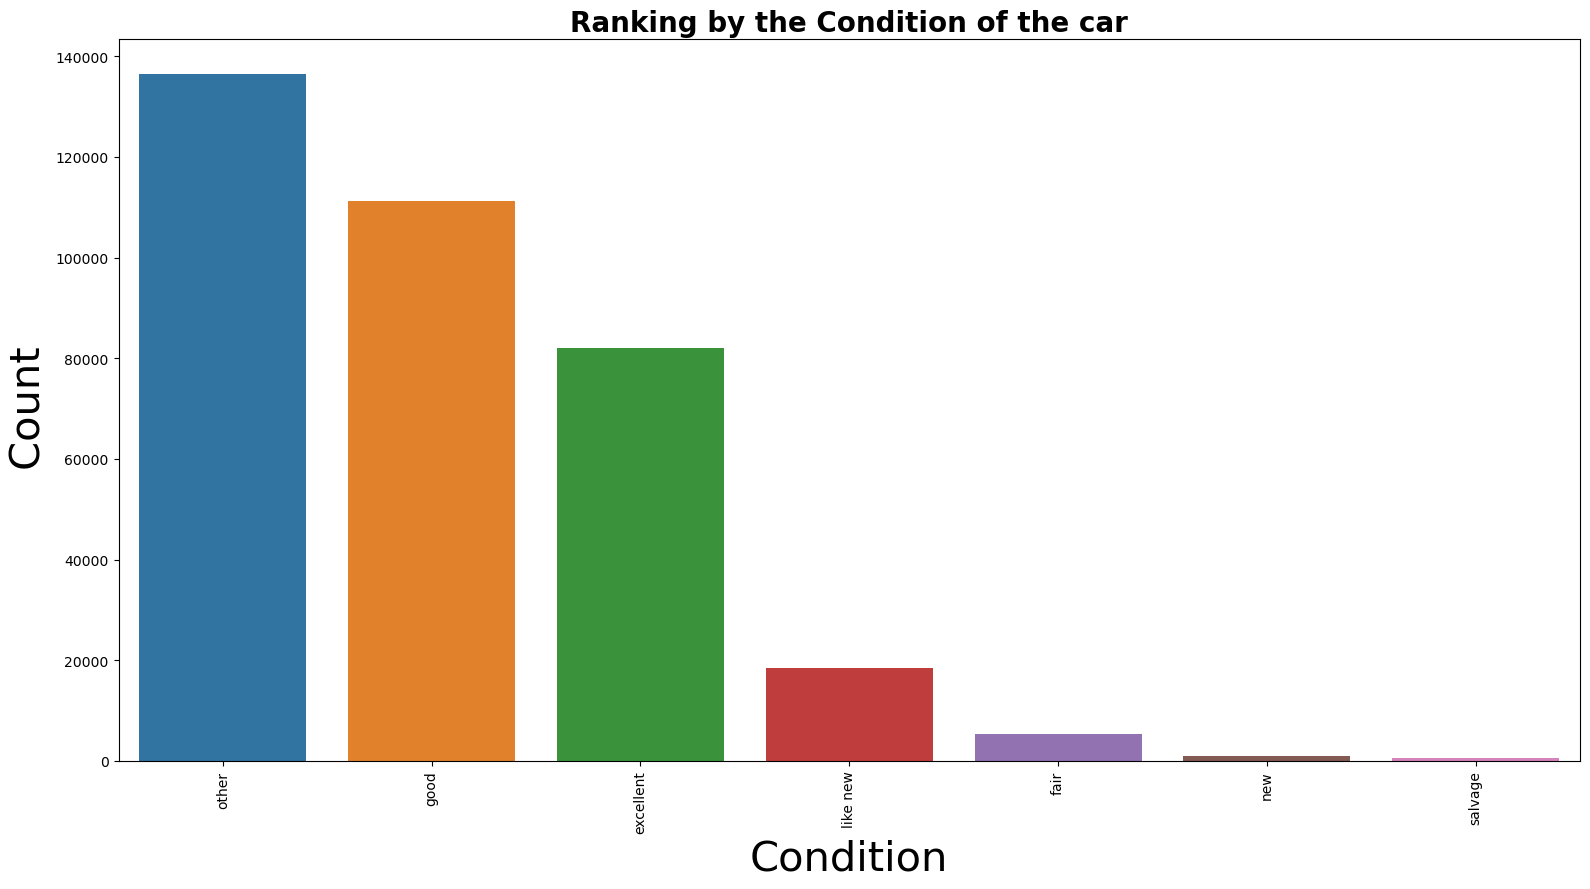

In [25]:
plt.figure(figsize=(16,9))
sns.countplot(x='condition',data=df_n,order=df_n['condition'].value_counts().index)
plt.title("Ranking by the Condition of the car",fontsize=20,fontweight ='bold')
plt.xlabel('Condition',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

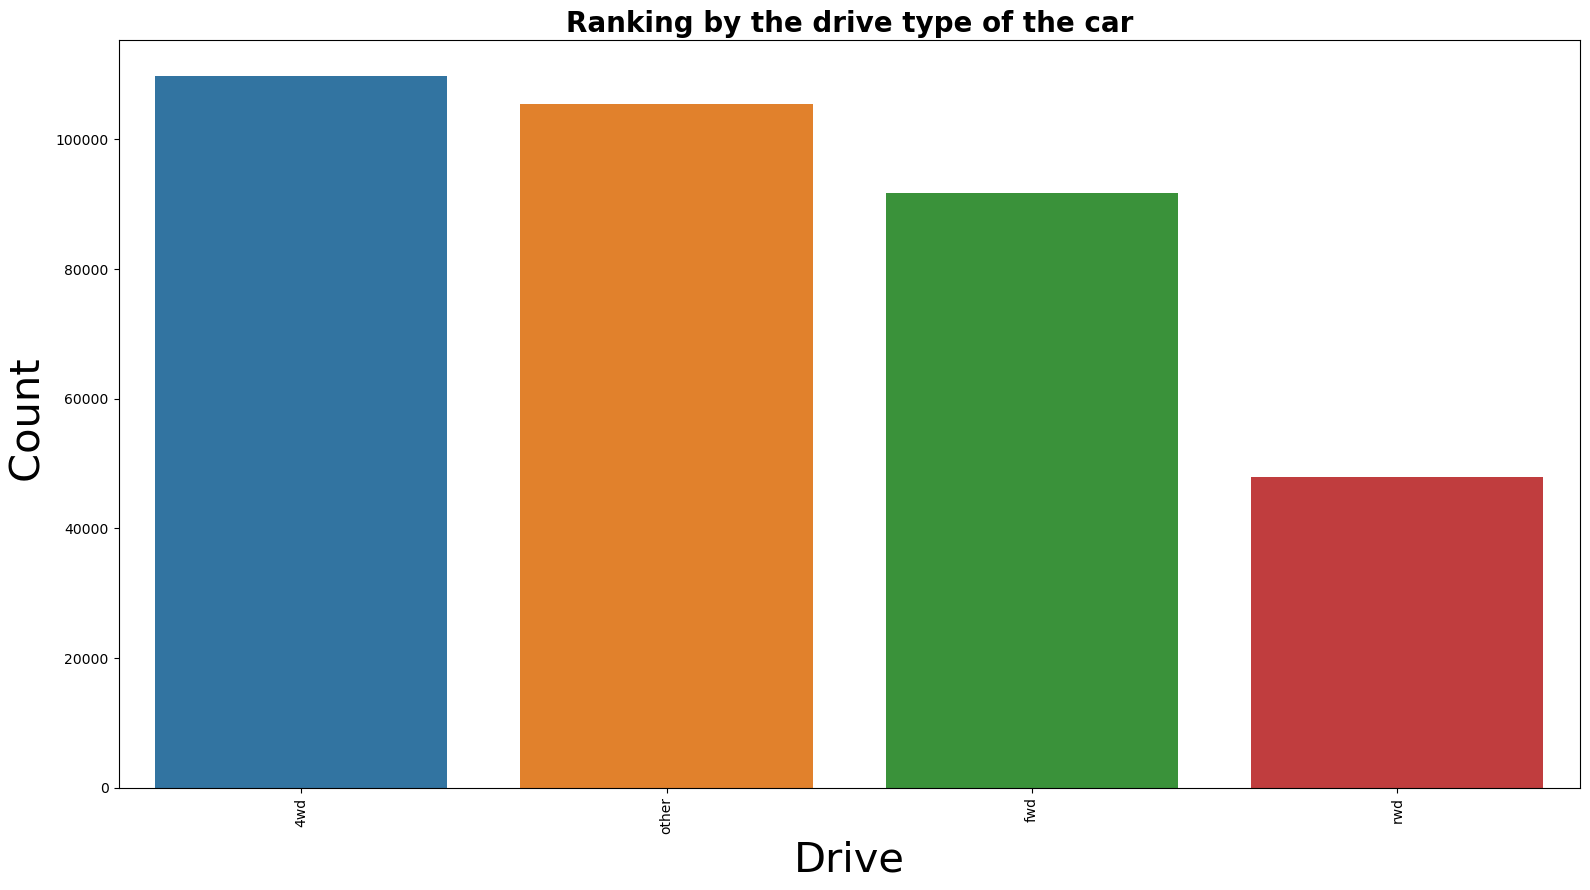

In [26]:
plt.figure(figsize=(16,9))
sns.countplot(x='drive',data=df_n,order=df_n['drive'].value_counts().index)
plt.title("Ranking by the drive type of the car",fontsize=20,fontweight ='bold')
plt.xlabel('Drive',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

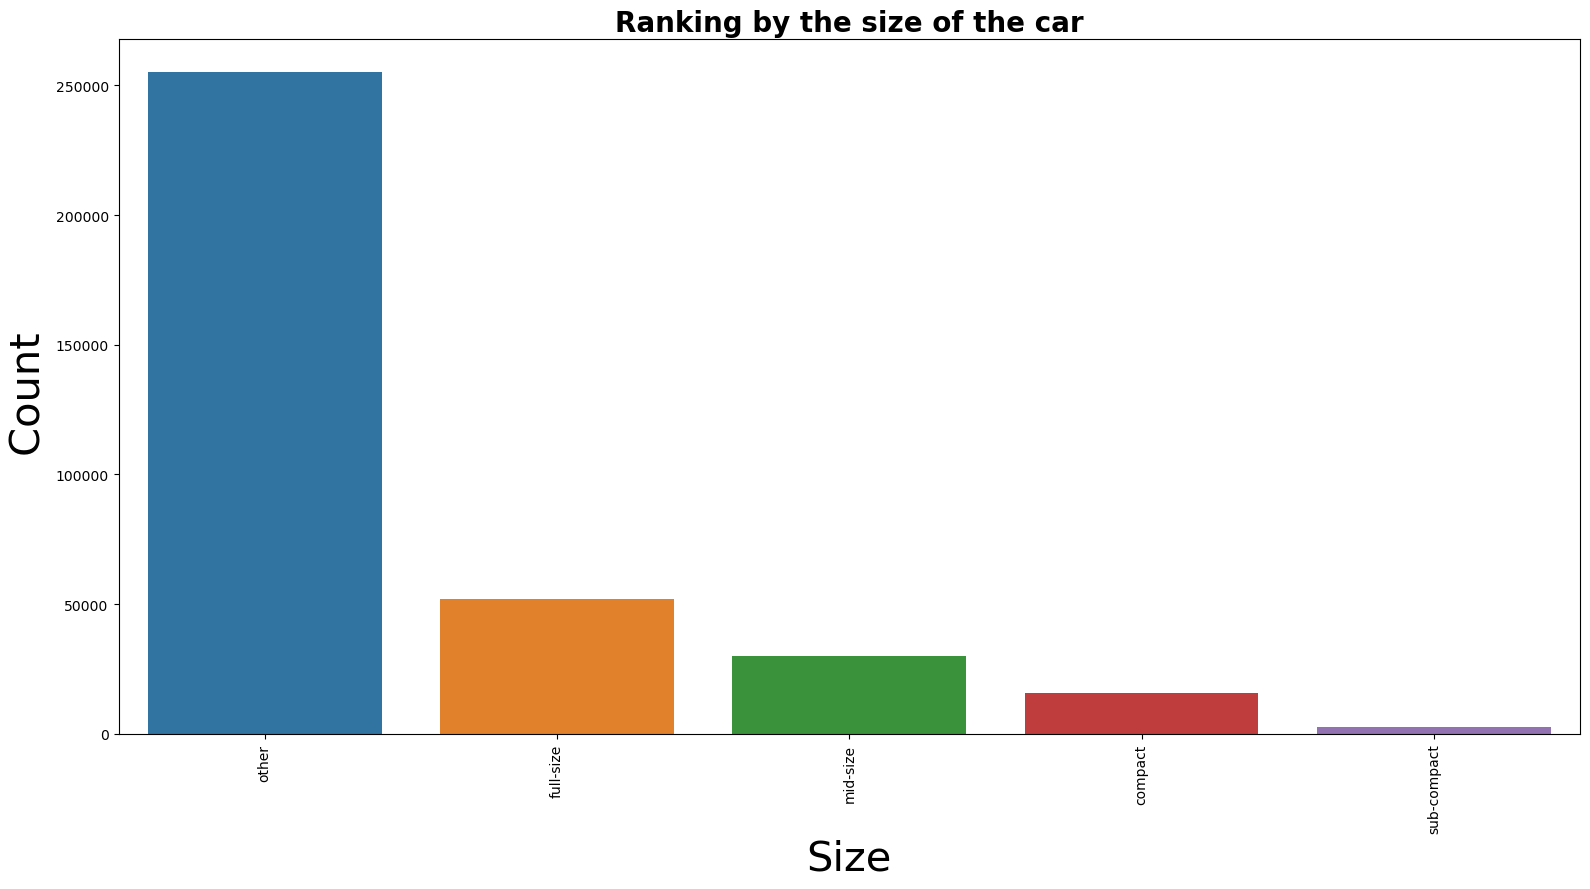

In [27]:
plt.figure(figsize=(16,9))
sns.countplot(x='size',data=df_n,order=df_n['size'].value_counts().index)
plt.title("Ranking by the size of the car",fontsize=20,fontweight ='bold')
plt.xlabel('Size',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

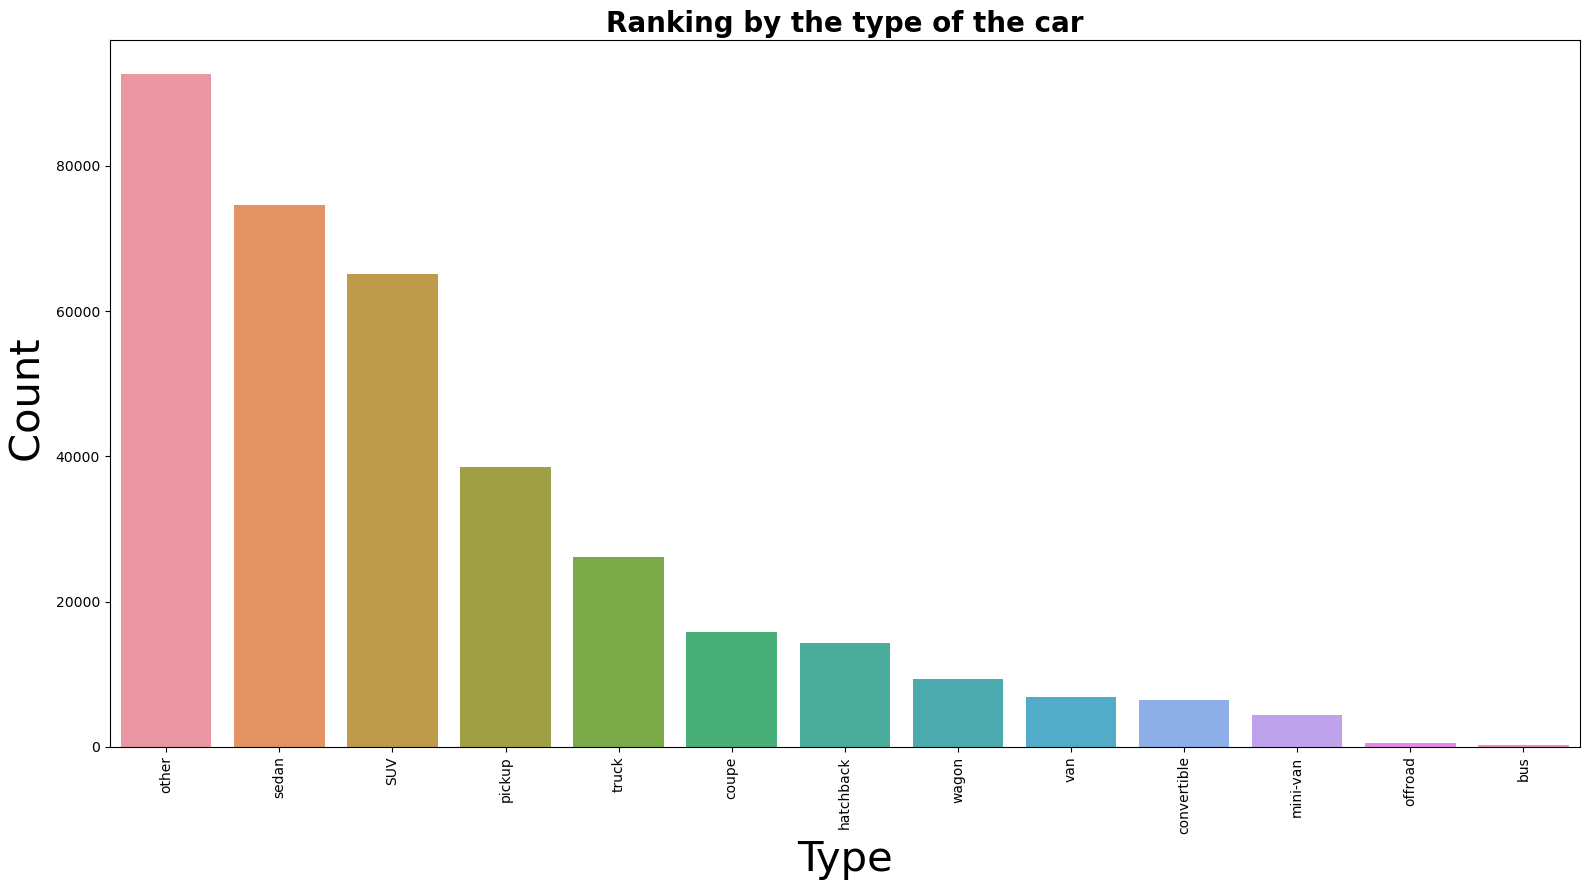

In [28]:
plt.figure(figsize=(16,9))
sns.countplot(x='type',data=df_n,order=df_n['type'].value_counts().index)
plt.title("Ranking by the type of the car",fontsize=20,fontweight ='bold')
plt.xlabel('Type',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Count ',fontsize = 30)
plt.tight_layout()
plt.show()

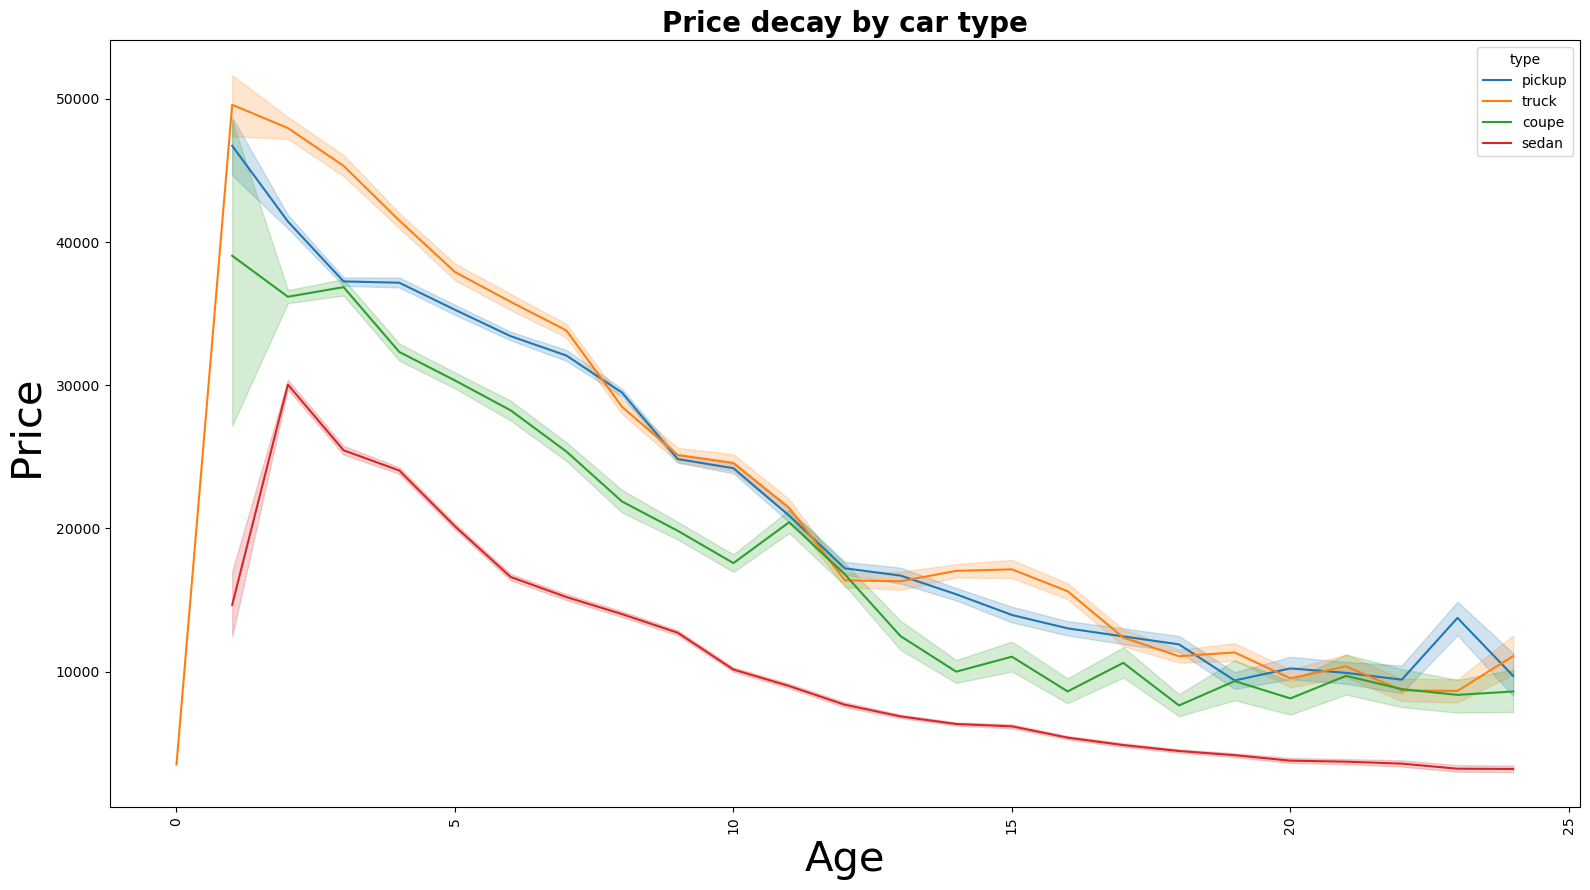

In [29]:
plt.figure(figsize=(16,9))
sns.lineplot(x='age',y='price',data=df_n.loc[(df_n['age']<25)&(df_n['type']\
            .isin(['sedan','coupe','pickup','truck']))]
             ,hue='type')
plt.title("Price decay by car type",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Price ',fontsize = 30)
plt.tight_layout()
plt.show()

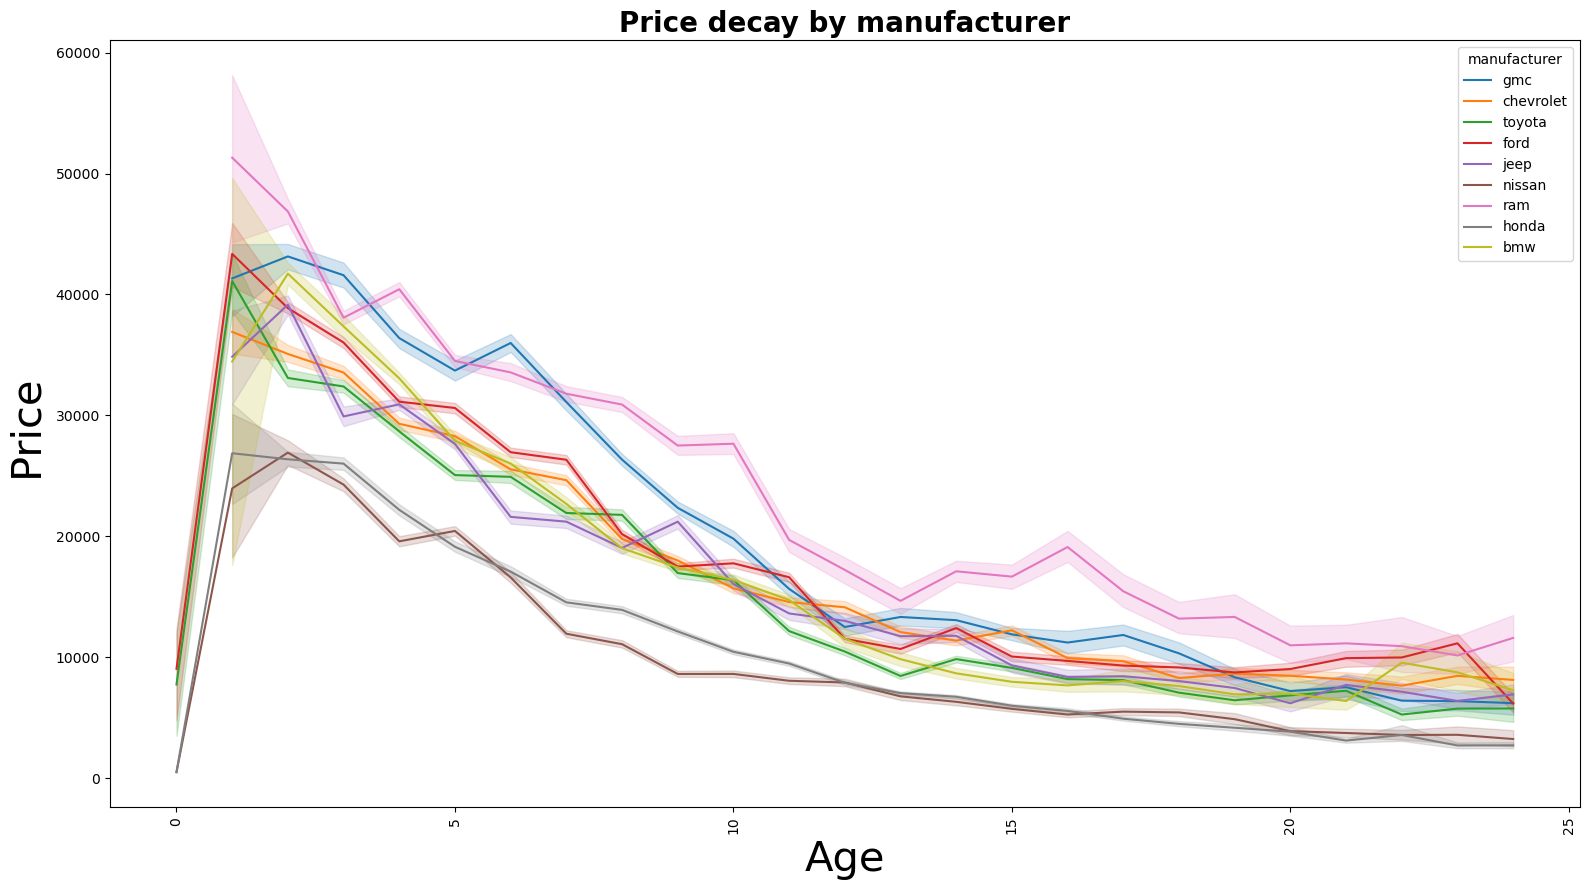

In [30]:
plt.figure(figsize=(16,9))
sns.lineplot(x='age',y='price',data=df_n.loc[(df_n['age']<25)&(df_n['manufacturer']\
            .isin(['ford','chevrolet','toyota','honda','nissan','jeep','ram','gmc','bmw']))]
             ,hue='manufacturer')
plt.title("Price decay by manufacturer",fontsize=20,fontweight ='bold')
plt.xlabel('Age',fontsize = 30)
plt.xticks(rotation=90)
plt.ylabel('Price ',fontsize = 30)
plt.tight_layout()
plt.show()

# Price prediction

In [31]:
enc = OneHotEncoder(handle_unknown='ignore')
lr = LinearRegression()
drop_list = ['price']
X = df_n.drop(drop_list, axis=1)

enc.fit(X)
X = enc.transform(X)
y = df_n['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = .3)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('R2_score: ', r2_score(y_test, y_pred)*100)
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

R2_score:  87.33103091207275
Mean squared error:  23183206.744888365
